In [5]:
from sklearn.datasets import load_digits

In [6]:
dataset=load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
import pandas as pd
x=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
y=pd.DataFrame(data=dataset.target,columns=["Target"])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',gamma=0.001)
svc.fit(x_train,y_train)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.001, kernel='linear')

In [15]:
y_pred=svc.predict(x_test)

In [17]:
svc.score(x_test,y_test)

0.9777777777777777

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       1.00      0.96      0.98        53
           2       1.00      0.98      0.99        62
           3       0.98      0.98      0.98        52
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        53
           6       0.98      0.98      0.98        61
           7       1.00      0.98      0.99        60
           8       0.89      0.93      0.91        45
           9       0.94      0.98      0.96        45

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [21]:
print(confusion_matrix(y_pred,y_test))

[[47  0  0  0  0  0  1  0  0  0]
 [ 0 51  0  0  0  0  0  0  2  0]
 [ 0  0 61  0  0  0  0  0  1  0]
 [ 0  0  0 51  0  0  0  0  0  1]
 [ 1  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 53  0  0  0  0]
 [ 0  0  0  0  0  1 60  0  0  0]
 [ 0  0  0  0  0  0  0 59  1  0]
 [ 0  0  0  1  0  0  0  0 42  2]
 [ 0  0  0  0  0  0  0  0  1 44]]


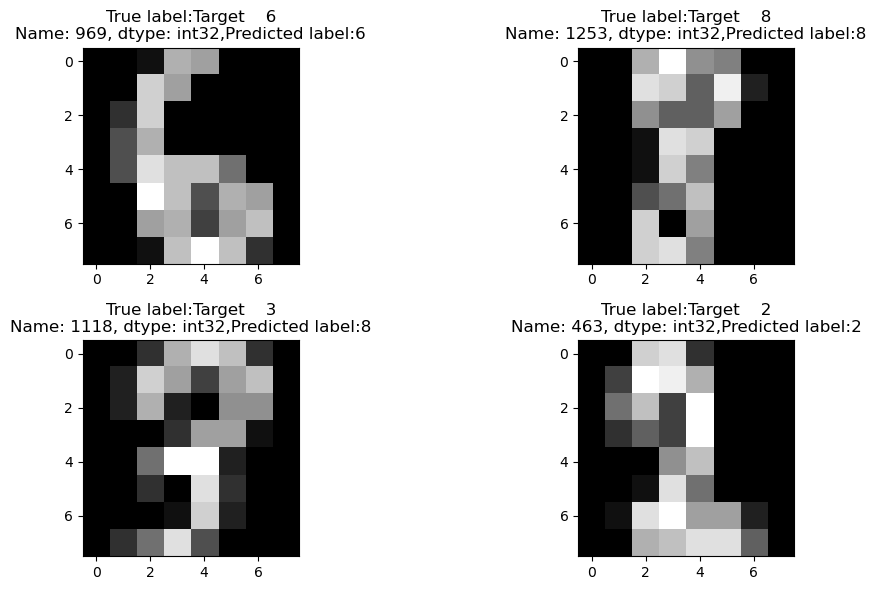

In [29]:
plt.figure(figsize=(12,6))
import matplotlib.pyplot as plt
import numpy as np
x_testnp=np.array(x_test)
for i in range(1,5):
  plt.subplot(2,2,i)
  image=x_testnp[i].reshape(8,8)
  plt.imshow(image,cmap='gray')
  plt.title(f"True label:{y_test.iloc[i]},Predicted label:{y_pred[i]}")
plt.tight_layout()

In [108]:
from sklearn.feature_selection import SelectKBest, SelectPercentile,chi2
kbest=SelectKBest(score_func=chi2,k=2)
kbest.fit(x_train,y_train)

SelectKBest(k=2, score_func=<function chi2 at 0x00000257DFCB2660>)